In [1]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Import Data

Begin by importing the data from the file called `PolynomialRegressionData_I.csv`.

In [2]:
import pandas as pd

fileName = "PolynomialRegressionData_I.csv"
RawData = pd.read_csv(fileName)
RawData

,x,y,z
0,-3.319120,-2.070820,-960.075064
1,8.812980,8.055306,109.527857
2,-19.995425,-19.407131,4867.408412
3,-7.906697,-7.559838,-149.039706
4,-14.129764,-12.762732,1493.048153
...,...,...,...
70,16.136077,14.321014,2411.074946
71,-14.501012,-13.816762,1938.853959
72,-14.428946,-14.396914,2201.489750
73,12.295652,12.491922,1595.894422


# Create First Image 

Use the [scatter3D](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) to plot in three dimensions.  Create four [subplots](https://matplotlib.org/3.1.0/gallery/recipes/create_subplots.html) with the appropriate viewing angles using the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) function.

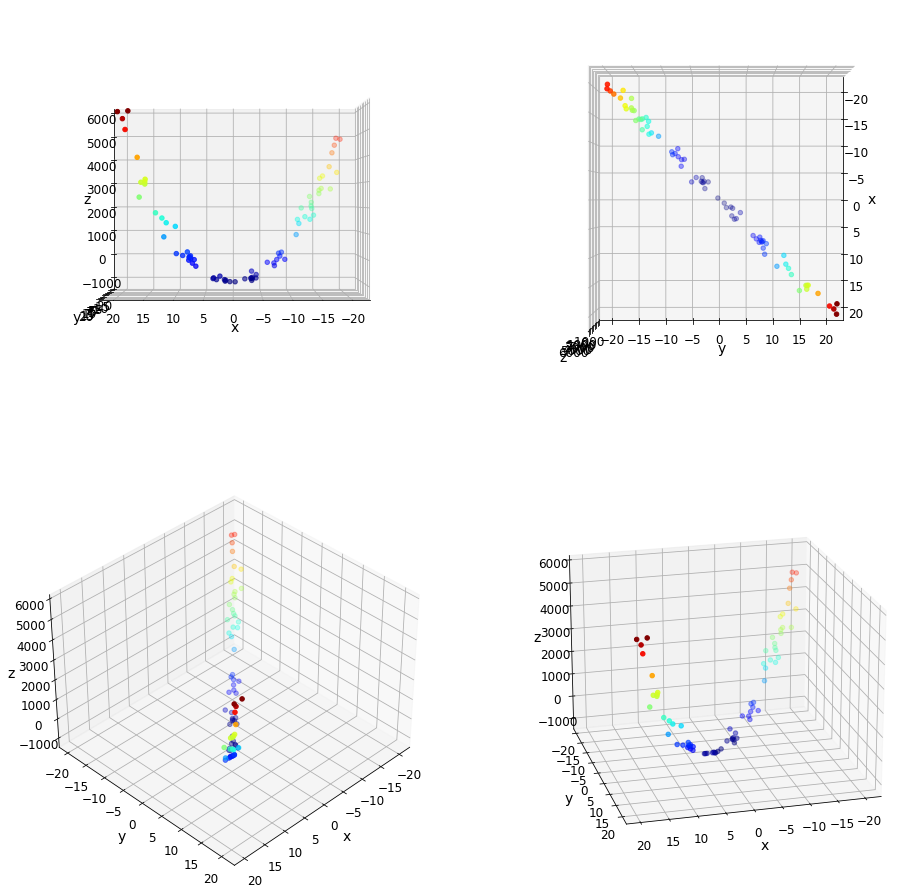

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

#assign data to axis
xaxis = RawData["x"]
yaxis = RawData["y"]
zaxis = RawData["z"]

#create plots
ImageOne = plt.figure(figsize=(16, 16))

#plot one
POne = ImageOne.add_subplot(2, 2, 1, projection='3d')
POne.scatter3D(xaxis, yaxis, zaxis, c=zaxis, cmap='jet')
POne.view_init(0, 90)
POne.set_xlabel('x')
POne.set_ylabel('y')
POne.set_zlabel('z')

#plot two
PTwo = ImageOne.add_subplot(2, 2, 2, projection='3d')
PTwo.scatter3D(xaxis, yaxis, zaxis, c=zaxis, cmap='jet')
PTwo.view_init(90, 0)
PTwo.set_xlabel('x')
PTwo.set_ylabel('y')
PTwo.set_zlabel('z')

#plot three
PThree = ImageOne.add_subplot(2, 2, 3, projection='3d')
PThree.scatter3D(xaxis, yaxis, zaxis, c=zaxis, cmap='jet')
PThree.view_init(37, 45)
PThree.set_xlabel('x')
PThree.set_ylabel('y')
PThree.set_zlabel('z')

#plot four
PFour = ImageOne.add_subplot(2, 2, 4, projection='3d')
PFour.scatter3D(xaxis, yaxis, zaxis, c=zaxis, cmap='jet')
PFour.view_init(20, 75)
PFour.set_xlabel('x')
PFour.set_ylabel('y')
PFour.set_zlabel('z')

#plot figures
plt.show()

# Perform Polynomial Features Transformation

Perform a polynomial transformation on your features.

In [4]:
from sklearn.preprocessing import PolynomialFeatures

#creating feature dataframes
NewXYvar = np.array(RawData[['x','y']])
NewZvar = np.array(RawData[['z']])               

#polynomial transformation and fitting
pfVar = PolynomialFeatures(degree=2, include_bias=False)
fitVar = pfVar.fit_transform(NewXYvar, NewZvar)

# Train Linear Regression Model

From the `sklearn.linear_model` library, import the `LinearRegression` class.  Instantiate an object of this class called `model`, and fit it to the data. `x` and `y` will be your training data and `z` will be your response. Print the optimal model parameters to the screen by completing the following `print()` statements.

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(fitVar, NewZvar)

LinearRegression()

In [6]:
print("Computed Model Coefficients: ", model.coef_)
print("Computed Model Intercept : ", model.intercept_)

Computed Model Coefficients:  [[ 8.09457649 -0.09962593 -0.05144212  0.10558512 15.94863437]]
Computed Model Intercept :  [-1000.13811493]


# Create Second Image

Use the following `x_fit` and `y_fit` data to compute `z_fit` by invoking the model's `predict()` method.  This will allow you to plot the line of best fit that is predicted by the model.

Recreate the first image, but plot the line of best fit in each of the subplots as well.

In [7]:
# Plot Curve Fit
x_fit = np.linspace(-21,21,1000)
y_fit = x_fit

#reshaping x and y best-fit lines
x_fit = x_fit.reshape(-1, 1)
y_fit = y_fit.reshape(-1, 1)

#stack and reshaping best-fit arrays
reshapeXYvar = np.hstack([x_fit, y_fit])
reshapeZvar= pfVar.transform(reshapeXYvar)

#running prediction model and collapsing array into one dimension
z_fit = model.predict(reshapeZvar)
x_fit = (x_fit.flatten())
y_fit = (y_fit.flatten())
z_fit = (z_fit.flatten())

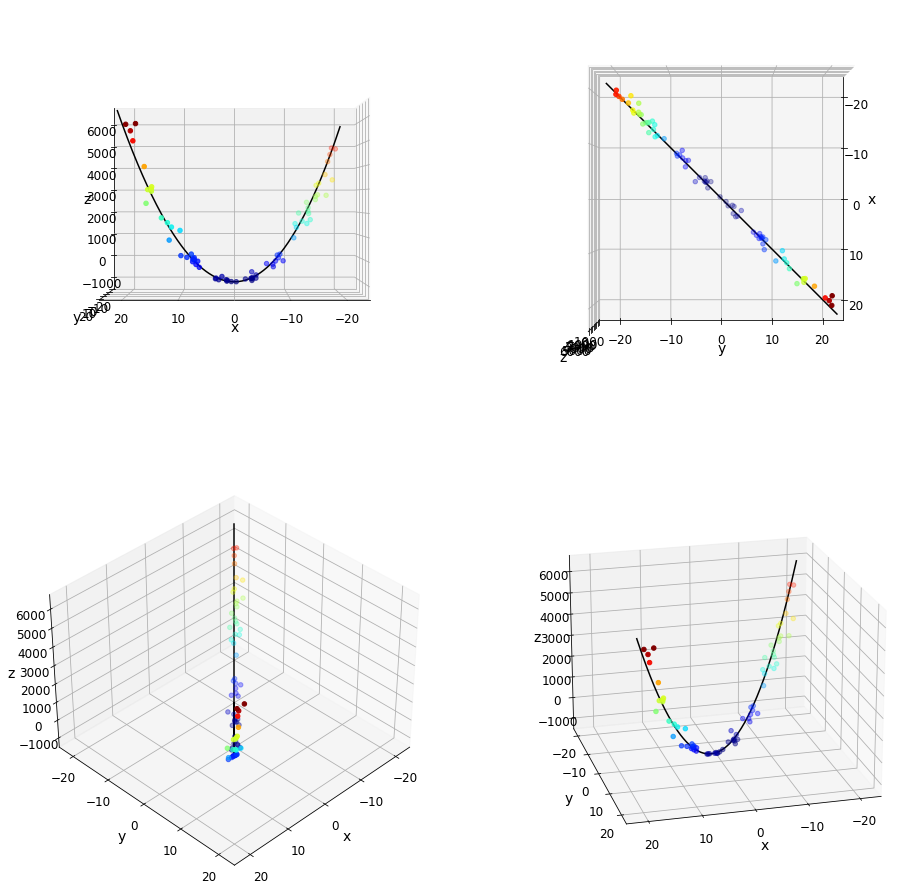

In [8]:
#assign data to axis
xaxis = RawData["x"]
yaxis = RawData["y"]
zaxis = RawData["z"]

#create plots
ImageTwo = plt.figure(figsize=(16, 16))

#plot one
POne = ImageTwo.add_subplot(2, 2, 1, projection='3d')
POne.scatter3D(xaxis, yaxis, zaxis, c=zaxis, cmap='jet')
POne.plot3D(x_fit, y_fit, z_fit, 'black')
POne.view_init(0, 90)
POne.set_xlabel('x')
POne.set_ylabel('y')
POne.set_zlabel('z')

#plot two
PTwo = ImageTwo.add_subplot(2, 2, 2, projection='3d')
PTwo.scatter3D(xaxis, yaxis, zaxis, c=zaxis, cmap='jet')
PTwo.plot3D(x_fit, y_fit, z_fit, 'black')
PTwo.view_init(90, 0)
PTwo.set_xlabel('x')
PTwo.set_ylabel('y')
PTwo.set_zlabel('z')

#plot three
PThree = ImageTwo.add_subplot(2, 2, 3, projection='3d')
PThree.scatter3D(xaxis, yaxis, zaxis, c=zaxis, cmap='jet')
PThree.plot3D(x_fit, y_fit, z_fit, 'black')
PThree.view_init(37, 45)
PThree.set_xlabel('x')
PThree.set_ylabel('y')
PThree.set_zlabel('z')

#plot four
PFour = ImageTwo.add_subplot(2, 2, 4, projection='3d')
PFour.scatter3D(xaxis, yaxis, zaxis, c=zaxis, cmap='jet')
PFour.plot3D(x_fit, y_fit, z_fit, 'black')
PFour.view_init(20, 75)
PFour.set_xlabel('x')
PFour.set_ylabel('y')
PFour.set_zlabel('z')

#plot figures
plt.show()

# Infer the True Model Parameters

Provided that the true model parameters are **integer values**, you are able to infer the true model parameters by rounding the coefficients and the intercept to the nearest integer value.  You may "hard-code" these values into the below print statements. (See the assignment 3 template for more information)

Use the `get_feature_names()` (this has been deprecated -- depending on your version of sklearn, you may need to use `get_feature_names_out()`) method of the `PolynomialFeatures` class to be certain of which coefficients you calculated!  You need to report your final answers in a format that is ___abundantly clear___ to me which which coefficient corresponds to which dependent variable of the model!  You may add more `print()` statements to accomplish this if you must.

In [9]:
#creating Model Coefficient and Intercept variables
TMC = list(map(int, model.coef_[0]))
TMI = int(model.intercept_)

#printing model coefficient and intercepts
print("True Model Coefficients: ", TMC)
print("True Model Intercept : ", TMI)

print()

#creating list and feature variables
listVar = ['a1','b1','b2','c1','c2']
featVar = pfVar.get_feature_names()

#creating accumulator variable
accumVar = 0

#creating for loop to match feature, variable and coefficient 
for j in list(map(int, model.coef_[0])):
    print('Feature Name: {} ({}). Coefficient: {}.'.format(featVar[accumVar],listVar[accumVar], j))
    accumVar = accumVar + 1 

True Model Coefficients:  [8, 0, 0, 0, 15]
True Model Intercept :  -1000

Feature Name: x0 (a1). Coefficient: 8.
Feature Name: x1 (b1). Coefficient: 0.
Feature Name: x0^2 (b2). Coefficient: 0.
Feature Name: x0 x1 (c1). Coefficient: 0.
Feature Name: x1^2 (c2). Coefficient: 15.
